Train MAE: 1.7693653875430122
Validation MAE: 2.199386030633998
Test MAE: 1.5441337286023822
Train R^2: 0.9539935077384046
Validation R^2: 0.8633703967739252
Test R^2: 0.9595200319167222


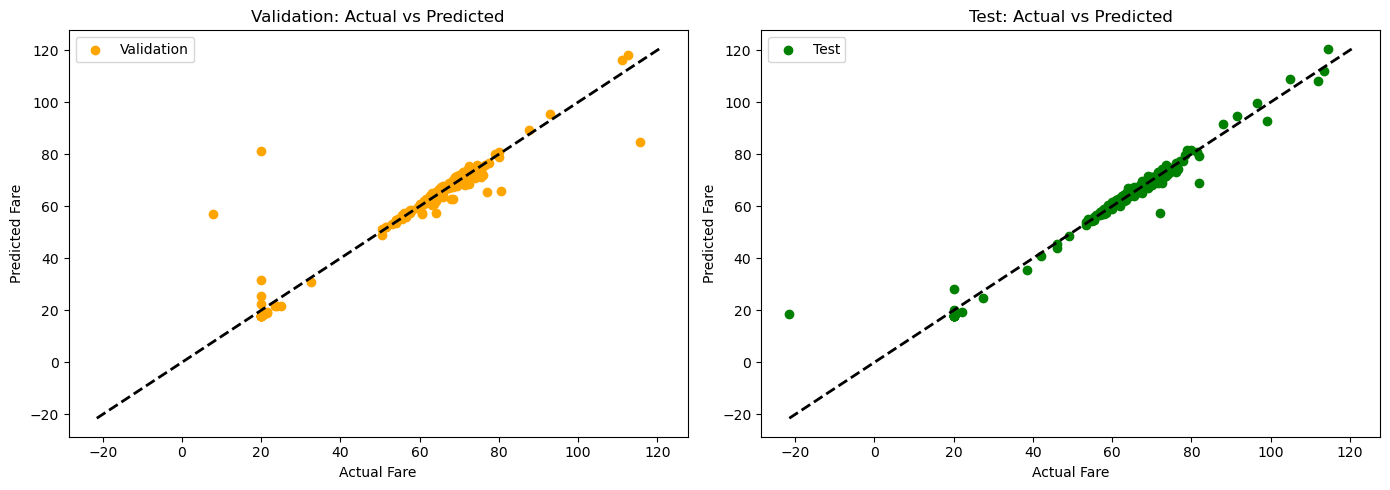

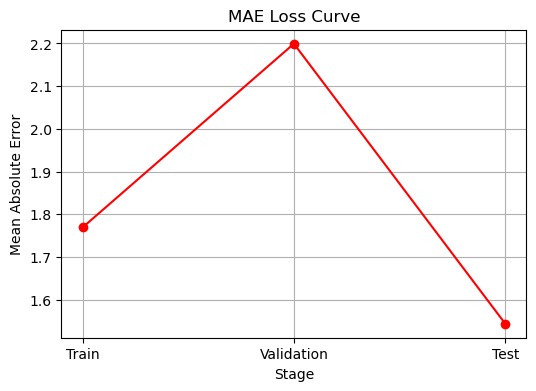

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Create the dataset


df = pd.read_csv("/Users/uv/Desktop/time series project/abcde.csv")
# Features and target
X = df[['passenger_count', 'trip_distance', 'Minutes']]
y = df['fare_amount']

# Split into train+val and test (80% / 20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split train+val into train and val (75% / 25% of 80% = 60/20/20 overall)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Model
model = LinearRegression()
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Evaluation
train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print scores
print("Train MAE:", train_mae)
print("Validation MAE:", val_mae)
print("Test MAE:", test_mae)
print("Train R^2:", train_r2)
print("Validation R^2:", val_r2)
print("Test R^2:", test_r2)

# Visualization: Predicted vs Actual
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_val_pred, color='orange', label='Validation')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Validation: Actual vs Predicted')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Test: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

# Loss curves (MAE)
mae_scores = [train_mae, val_mae, test_mae]
stages = ['Train', 'Validation', 'Test']

plt.figure(figsize=(6, 4))
plt.plot(stages, mae_scores, marker='o', color='red')
plt.title('MAE Loss Curve')
plt.xlabel('Stage')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()


Train MAE: 1.2593451123248507
Validation MAE: 2.091206931668778
Test MAE: 1.8640816505643634
Train R^2: 0.9653025983337113
Validation R^2: 0.8585207499134901
Test R^2: 0.9101208491745953


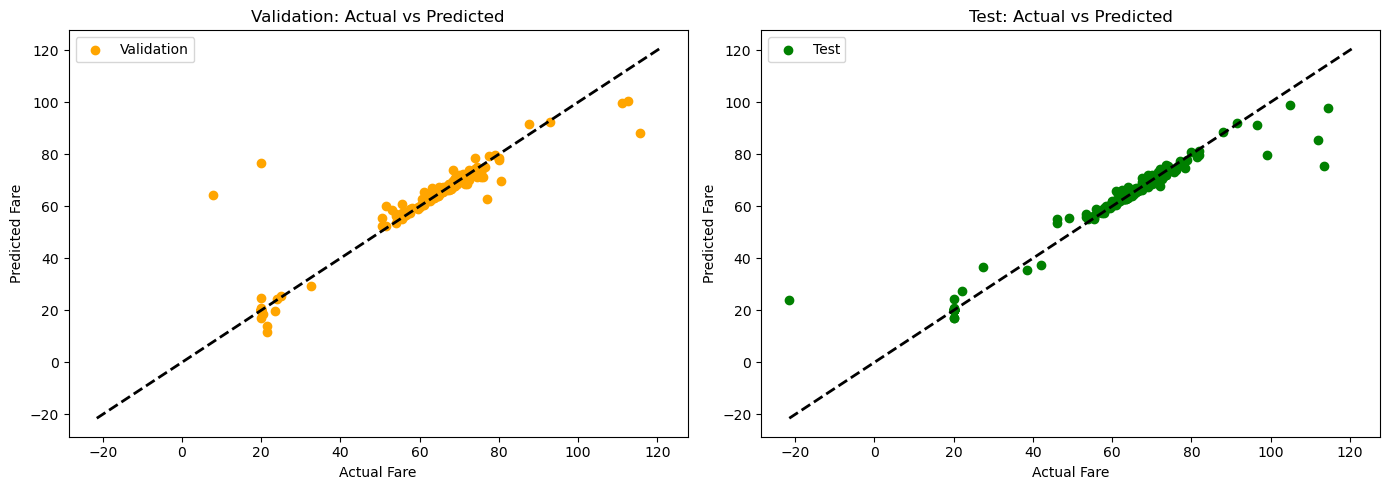

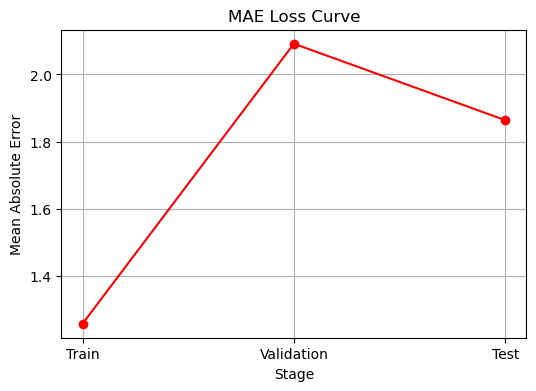

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load the dataset
df = pd.read_csv("/Users/uv/Desktop/time series project/abcde.csv")

# Features and target
X = df[['passenger_count', 'trip_distance', 'Minutes']]
y = df['fare_amount']

# Split into train+val and test (80% / 20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split train+val into train and val (60/20/20 overall)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Random Forest with hyperparameters
model = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt',
    random_state=42,
    n_jobs=-1
)
model.fit(X_train, y_train)

# Predictions
y_train_pred = model.predict(X_train)
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Evaluation
train_mae = mean_absolute_error(y_train, y_train_pred)
val_mae = mean_absolute_error(y_val, y_val_pred)
test_mae = mean_absolute_error(y_test, y_test_pred)

train_r2 = r2_score(y_train, y_train_pred)
val_r2 = r2_score(y_val, y_val_pred)
test_r2 = r2_score(y_test, y_test_pred)

# Print scores
print("Train MAE:", train_mae)
print("Validation MAE:", val_mae)
print("Test MAE:", test_mae)
print("Train R^2:", train_r2)
print("Validation R^2:", val_r2)
print("Test R^2:", test_r2)

# Visualization: Predicted vs Actual
plt.figure(figsize=(14, 5))

plt.subplot(1, 2, 1)
plt.scatter(y_val, y_val_pred, color='orange', label='Validation')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Validation: Actual vs Predicted')
plt.legend()

plt.subplot(1, 2, 2)
plt.scatter(y_test, y_test_pred, color='green', label='Test')
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel('Actual Fare')
plt.ylabel('Predicted Fare')
plt.title('Test: Actual vs Predicted')
plt.legend()

plt.tight_layout()
plt.show()

# Loss curves (MAE)
mae_scores = [train_mae, val_mae, test_mae]
stages = ['Train', 'Validation', 'Test']

plt.figure(figsize=(6, 4))
plt.plot(stages, mae_scores, marker='o', color='red')
plt.title('MAE Loss Curve')
plt.xlabel('Stage')
plt.ylabel('Mean Absolute Error')
plt.grid(True)
plt.show()


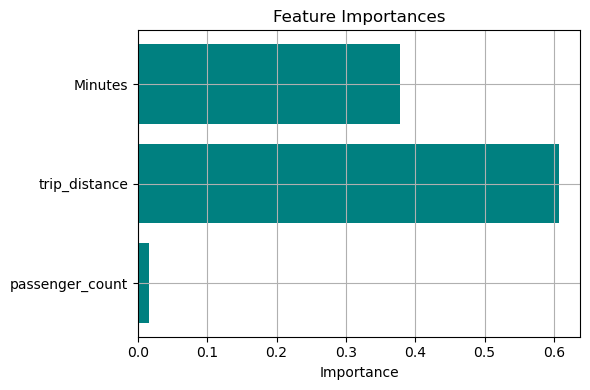

In [ ]:
# Feature Importance Plot
importances = model.feature_importances_
feature_names = X.columns

plt.figure(figsize=(6, 4))
plt.barh(feature_names, importances, color='teal')
plt.xlabel("Importance")
plt.title("Feature Importances")
plt.grid(True)
plt.tight_layout()
plt.show()


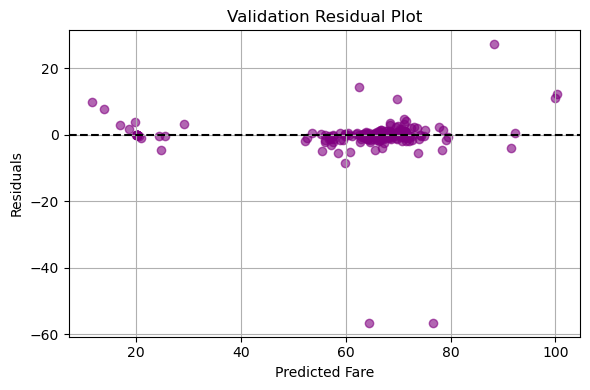

In [ ]:
# Residuals = Actual - Predicted
val_residuals = y_val - y_val_pred

plt.figure(figsize=(6, 4))
plt.scatter(y_val_pred, val_residuals, color='purple', alpha=0.6)
plt.axhline(0, color='black', linestyle='--')
plt.xlabel("Predicted Fare")
plt.ylabel("Residuals")
plt.title("Validation Residual Plot")
plt.grid(True)
plt.tight_layout()
plt.show()


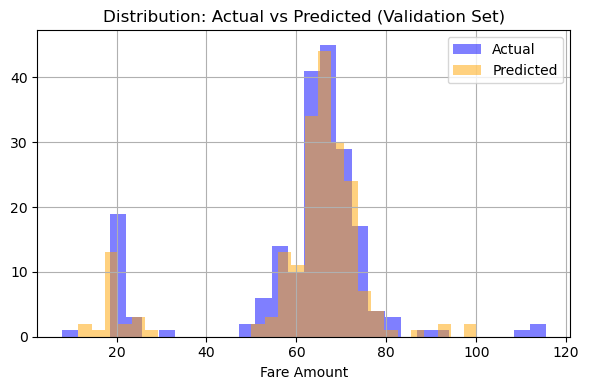

In [ ]:
plt.figure(figsize=(6, 4))
plt.hist(y_val, bins=30, alpha=0.5, label='Actual', color='blue')
plt.hist(y_val_pred, bins=30, alpha=0.5, label='Predicted', color='orange')
plt.legend()
plt.xlabel('Fare Amount')
plt.title('Distribution: Actual vs Predicted (Validation Set)')
plt.grid(True)
plt.tight_layout()
plt.show()


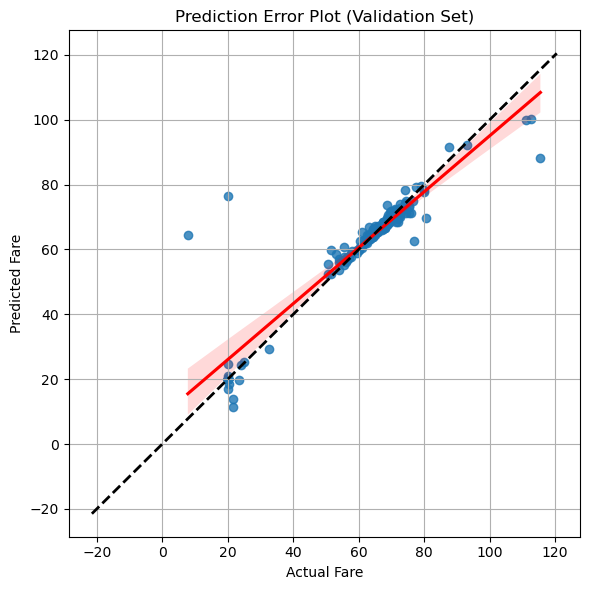

In [ ]:
import seaborn as sns

plt.figure(figsize=(6, 6))
sns.regplot(x=y_val, y=y_val_pred, line_kws={"color": "red"})
plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=2)
plt.xlabel("Actual Fare")
plt.ylabel("Predicted Fare")
plt.title("Prediction Error Plot (Validation Set)")
plt.grid(True)
plt.tight_layout()
plt.show()


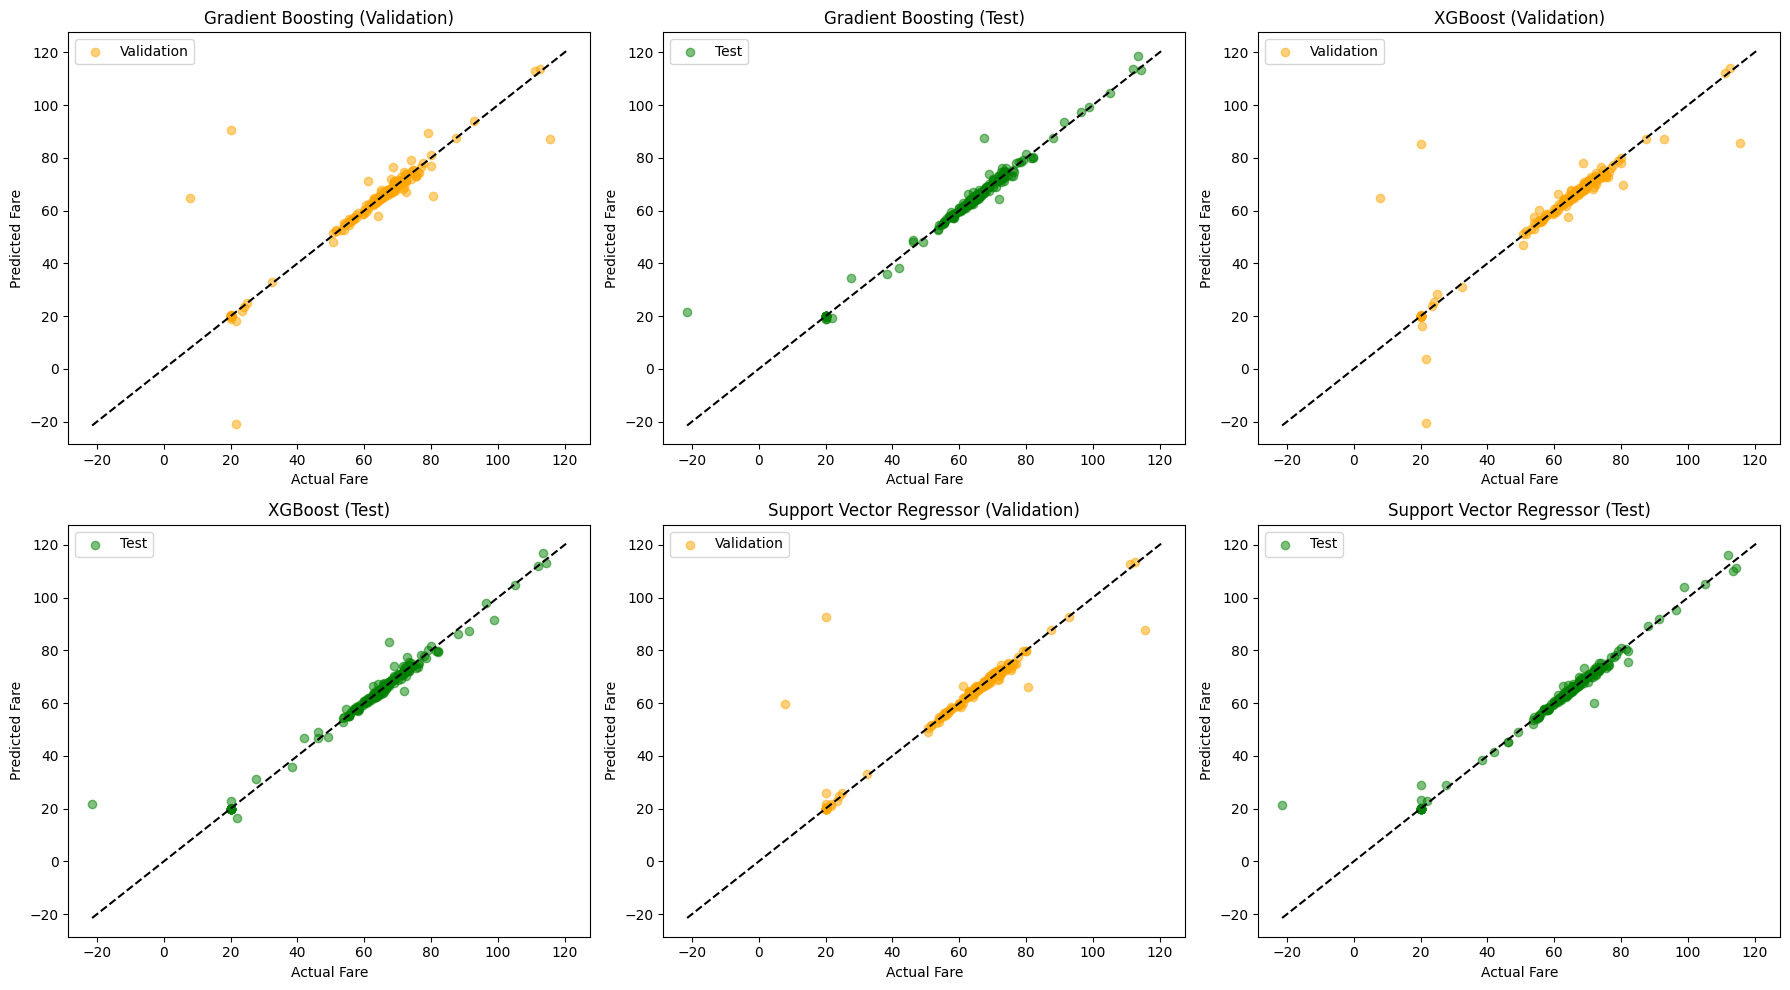


Model Performance Comparison:
                      Model  Train MAE  Validation MAE  Test MAE  Test R^2
0         Gradient Boosting   0.288798        1.999383  1.137840  0.957907
1                   XGBoost   0.433912        1.989197  1.195634  0.958869
2  Support Vector Regressor   0.953523        1.443588  1.017683  0.962740


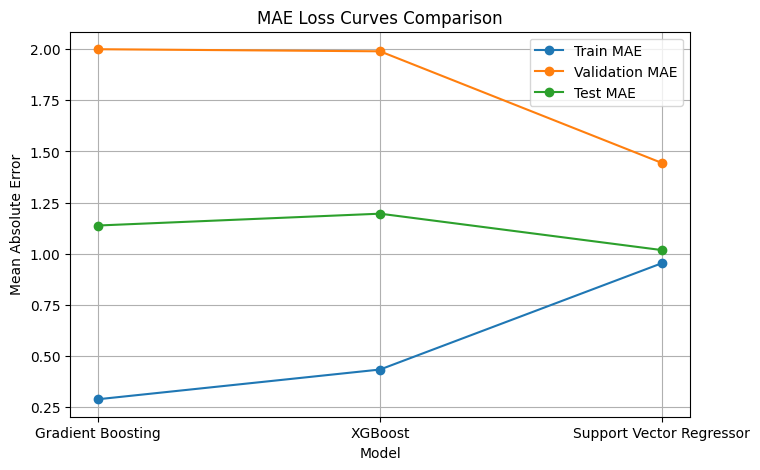

In [2]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_absolute_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

# Load dataset
df = pd.read_csv("/content/sample_data/abcde.csv")

# Features and target
X = df[['passenger_count', 'trip_distance', 'Minutes']]
y = df['fare_amount']

# Split into train+val and test (80% / 20%)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Split train+val into train and val (60/20/20 overall)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Models
models = {
    'Gradient Boosting': GradientBoostingRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42),
    'XGBoost': XGBRegressor(n_estimators=200, learning_rate=0.1, max_depth=5, random_state=42, n_jobs=-1),
    'Support Vector Regressor': SVR(kernel='rbf', C=100, epsilon=0.1)
}

# To store performance
performance = []

# Visualization setup
plt.figure(figsize=(18, 10))

for idx, (name, model) in enumerate(models.items()):
    # Train
    model.fit(X_train, y_train)

    # Predict
    y_train_pred = model.predict(X_train)
    y_val_pred = model.predict(X_val)
    y_test_pred = model.predict(X_test)

    # Evaluate
    train_mae = mean_absolute_error(y_train, y_train_pred)
    val_mae = mean_absolute_error(y_val, y_val_pred)
    test_mae = mean_absolute_error(y_test, y_test_pred)

    train_r2 = r2_score(y_train, y_train_pred)
    val_r2 = r2_score(y_val, y_val_pred)
    test_r2 = r2_score(y_test, y_test_pred)

    # Save performance
    performance.append({
        'Model': name,
        'Train MAE': train_mae,
        'Validation MAE': val_mae,
        'Test MAE': test_mae,
        'Test R^2': test_r2
    })

    # Plot Predicted vs Actual (Validation Set)
    plt.subplot(2, 3, idx*2 + 1)
    plt.scatter(y_val, y_val_pred, alpha=0.5, label='Validation', color='orange')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
    plt.xlabel('Actual Fare')
    plt.ylabel('Predicted Fare')
    plt.title(f'{name} (Validation)')
    plt.legend()

    # Plot Predicted vs Actual (Test Set)
    plt.subplot(2, 3, idx*2 + 2)
    plt.scatter(y_test, y_test_pred, alpha=0.5, label='Test', color='green')
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'k--')
    plt.xlabel('Actual Fare')
    plt.ylabel('Predicted Fare')
    plt.title(f'{name} (Test)')
    plt.legend()

plt.tight_layout()
plt.show()

# Create performance comparison table
performance_df = pd.DataFrame(performance)
print("\nModel Performance Comparison:")
print(performance_df)

# MAE Loss Curve Comparison
plt.figure(figsize=(8,5))
for metric in ['Train MAE', 'Validation MAE', 'Test MAE']:
    plt.plot(performance_df['Model'], performance_df[metric], marker='o', label=metric)

plt.title('MAE Loss Curves Comparison')
plt.xlabel('Model')
plt.ylabel('Mean Absolute Error')
plt.legend()
plt.grid(True)
plt.show()
